# Q3: Even deeper! Resnet18 for PASCAL classification (15 pts)

Hopefully we all got much better accuracy with the deeper model! Since 2012, much deeper architectures have been proposed. [ResNet](https://arxiv.org/abs/1512.03385) is one of the popular ones. In this task, we attempt to further improve the performance with the “very deep” ResNet-18 architecture.


## 3.1 Build ResNet-18 (1 pts)
Write a network modules for the Resnet-18 architecture (refer to the original paper). You can use `torchvision.models` for this section, so it should be very easy!

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset
import torchvision.models as models
%env CUDA_VISIBLE_DEVICES=2

# you could write the whole class....
# or one line :D
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(512,20)


env: CUDA_VISIBLE_DEVICES=2


## 3.2 Add Tensorboard Summaries (6 pts)
You should've already written tensorboard summary generation code into `trainer.py` from q1. However, you probably just added the most basic summary features. Please implement the more advanced summaries listed here:
* training loss (should be done)
* testing MAP curves (should be done)
* learning rate
* histogram of gradients

## 3.3 Train and Test (8 pts)
Use the same hyperparameter settings from Task 2, and train the model for 50 epochs. Report tensorboard screenshots for *all* of the summaries listed above (for image summaries show screenshots at $n \geq 3$ iterations)

**REMEMBER TO SAVE A MODEL AT THE END OF TRAINING**

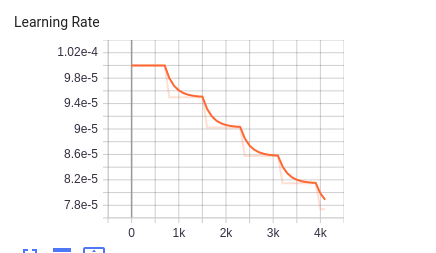
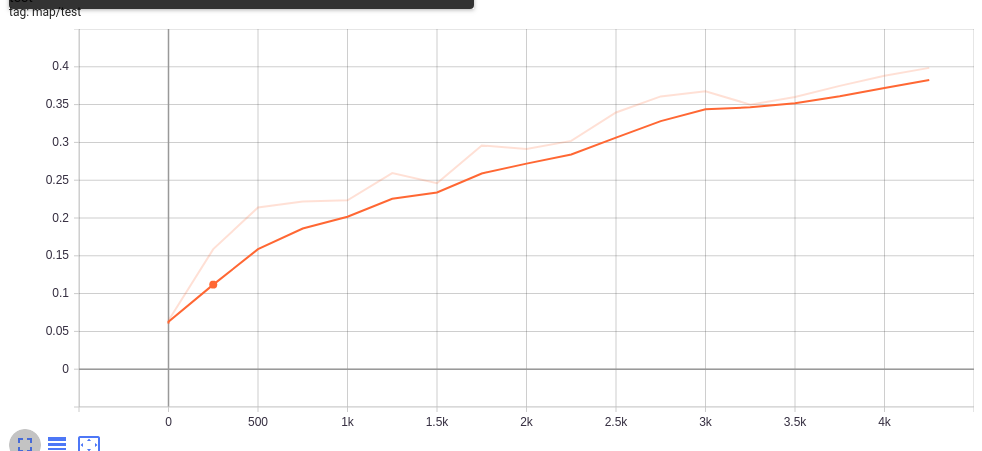
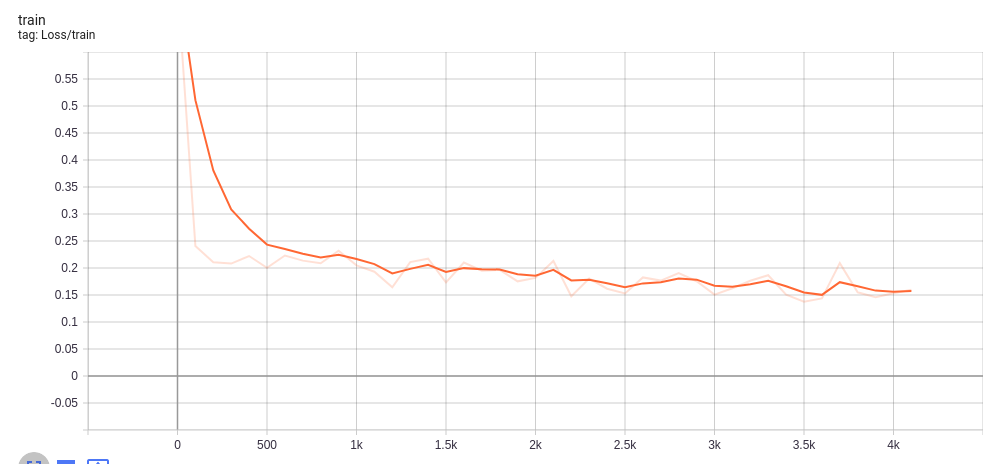
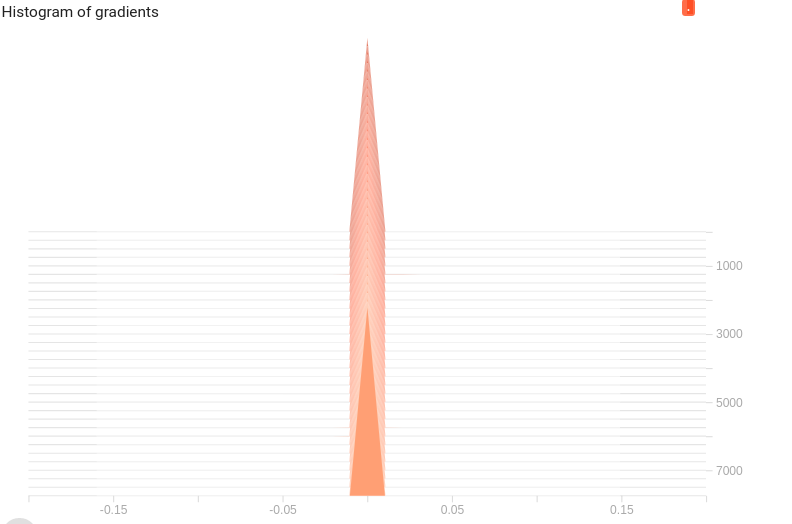

In [ ]:
args = ARGS(epochs=50, batch_size=32,test_batch_size=32, lr=0.0001,val_every=250,gamma=0.95,save_freq=5)
optimizer = torch.optim.Adam(model.parameters(),lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=5,gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler=scheduler,model_name='Resnet')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.724595
Test Epoch: 0 [0 (0%)]	mAP: 0.064447
Train Epoch: 0 [100 (64%)]	Loss: 0.240690
Train Epoch: 1 [200 (27%)]	Loss: 0.210770
Test Epoch: 1 [250 (59%)]	mAP: 0.158836
Train Epoch: 1 [300 (91%)]	Loss: 0.208182
Train Epoch: 2 [400 (55%)]	Loss: 0.222166
Train Epoch: 3 [500 (18%)]	Loss: 0.200253
Test Epoch: 3 [500 (18%)]	mAP: 0.213899
Train Epoch: 3 [600 (82%)]	Loss: 0.223122
Train Epoch: 4 [700 (46%)]	Loss: 0.213653
Test Epoch: 4 [750 (78%)]	mAP: 0.221856
Train Epoch: 5 [800 (10%)]	Loss: 0.208796
Train Epoch: 5 [900 (73%)]	Loss: 0.231935
Train Epoch: 6 [1000 (37%)]	Loss: 0.204920
Test Epoch: 6 [1000 (37%)]	mAP: 0.223353
Train Epoch: 7 [1100 (1%)]	Loss: 0.193087
Train Epoch: 7 [1200 (64%)]	Loss: 0.164151
Test Epoch: 7 [1250 (96%)]	mAP: 0.259397
Train Epoch: 8 [1300 (28%)]	Loss: 0.210884
Train Epoch: 8 [1400 (92%)]	Loss: 0.217275
Train Epoch: 9 [1500 (55%)]	Loss: 0.173273
Test Epoch: 9 [1500 (55%)]	mAP: 0.245985
Train Epoch: 10 [1600 (19%)]	Loss: 0.210115
Tr